In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

chi_square_results = pd.read_csv("overall_chi_square_results")
chi_square_results

,Unnamed: 0,species,observed,raw_expected,proportion,expected,chi_square_contribution
0,0,3.0,24,31,0.060311,18.575875,1.583835
1,1,61.0,16,22,0.042802,13.182879,0.602006
2,2,1172.0,14,18,0.035019,10.785992,0.957709
3,3,98.0,14,21,0.040856,12.583658,0.159415
4,4,102.0,13,22,0.042802,13.182879,0.002537
5,5,60.0,13,22,0.042802,13.182879,0.002537
6,6,93.0,13,21,0.040856,12.583658,0.013775
7,7,970.0,13,16,0.031128,9.587549,1.214578
8,8,12.0,13,22,0.042802,13.182879,0.002537
9,9,81.0,13,23,0.044747,13.782101,0.044382


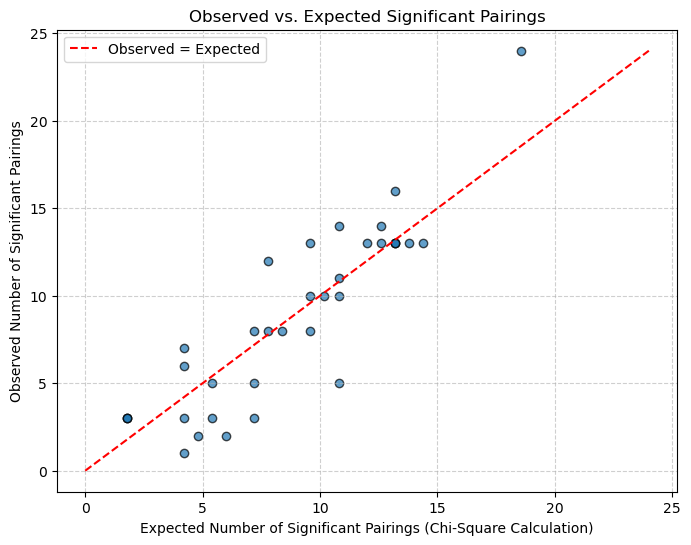

In [263]:
plt.figure(figsize=(8, 6))
plt.scatter(chi_square_results["expected"], chi_square_results["observed"], alpha=0.7, edgecolors="black")

# Reference line for observed = expected
max_value = max(chi_square_results["expected"].max(), chi_square_results["observed"].max())
plt.plot([0, max_value], [0, max_value], "r--", label="Observed = Expected")

plt.xlabel("Expected Number of Significant Pairings (Chi-Square Calculation)")
plt.ylabel("Observed Number of Significant Pairings")
plt.title("Observed vs. Expected Significant Pairings")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig("chi_square_scatterplot.png", dpi=300, bbox_inches="tight")
plt.show()

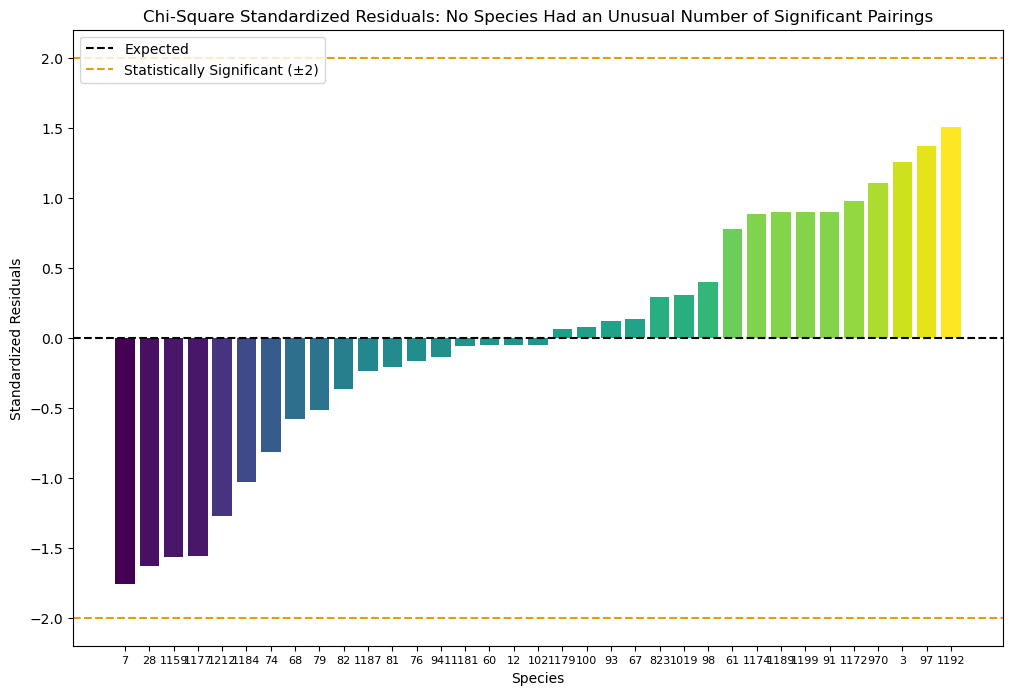

In [264]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate standardized residuals
chi_square_results["standardized_residuals"] = (chi_square_results["observed"] - chi_square_results["expected"]) / np.sqrt(chi_square_results["expected"])

# Convert species to string to ensure categorical plotting
chi_square_results["species"] = chi_square_results["species"].astype(int).astype(str)

# Sort by residuals for better visualization
df_sorted = chi_square_results.sort_values("standardized_residuals", ascending=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Ensure very small bars are still visible without flipping signs
min_width = 0.05  # Minimum visible bar width
bar_widths = df_sorted["standardized_residuals"].apply(lambda x: x if abs(x) > min_width else min_width * np.sign(x))

# Use a colormap for better differentiation
colors = plt.cm.viridis((df_sorted["standardized_residuals"] - df_sorted["standardized_residuals"].min()) / 
                         (df_sorted["standardized_residuals"].max() - df_sorted["standardized_residuals"].min()))

# Plot residuals as a horizontal bar chart
plt.bar(df_sorted["species"], bar_widths, color=colors, alpha=1)

# Set proper y-axis ticks and labels
plt.xticks(ticks=np.arange(len(df_sorted)), labels=df_sorted["species"], fontsize=8)  # Ensure species names appear

# Add reference lines at 0, ±2 for statistical significance
plt.axhline(y=0, color="black", linestyle="--", label="Expected")
plt.axhline(y=2, color="#E69F00", linestyle="--", label="Statistically Significant (+2)")
plt.axhline(y=-2, color="#E69F00", linestyle="--", label="Statistically Significant (-2)")

plt.legend(["Expected", "Statistically Significant (±2)"], loc="upper left")

# Labels and title
plt.ylabel("Standardized Residuals")
plt.xlabel("Species")
plt.title("Chi-Square Standardized Residuals: No Species Had an Unusual Number of Significant Pairings")

# Improve spacing and remove grid lines for clarity
plt.grid(False)

# Save and show the plot
plt.savefig("chi_square_residuals_fixed.png", dpi=300, bbox_inches="tight")
plt.show()

In [265]:
# Load the raw data
raw_data = pd.read_csv("raw_data.csv")

# Create a dictionary mapping species_id to common_name
species_dict = raw_data.drop_duplicates(subset=["species_id"])[["species_id", "common_name"]].set_index("species_id")["common_name"].to_dict()
# Print the dictionary
print(species_dict)



{444: 'Appalachian Spring dogwood', 1174: 'Allegheny serviceberry', 93: 'American basswood', 28: 'black cherry', 245: 'black-capped chickadee', 1226: 'black-throated blue warbler', 102: 'northern red oak', 3: 'red maple', 1172: 'yellow buckeye', 1227: 'Acadian flycatcher', 823: 'American hornbeam', 1233: 'Carolina chickadee', 1126: 'Carolina wren', 1098: 'black-throated green warbler', 1065: 'common blue violet', 12: 'flowering dogwood', 1236: 'hooded warbler', 1090: 'northern cardinal', 1230: 'northern parula', 377: 'red-eyed vireo', 1187: 'sourwood', 61: 'sugar maple', 98: 'sweet birch', 81: 'sweetgum', 82: 'tuliptree', 100: 'white oak', 1192: 'winged elm', 2191: 'yellow wakerobin', 79: 'American beech', 970: 'American sycamore', 2: 'boxelder', 1201: 'pawpaw', 60: 'striped maple', 33: 'black locust', 1159: 'black oak', 941: 'blackgum', 75: 'green ash', 949: 'hophornbeam', 1184: 'mountain magnolia', 97: 'yellow birch', 91: 'American mountain ash', 1199: 'mountain maple', 1189: 'pin ch

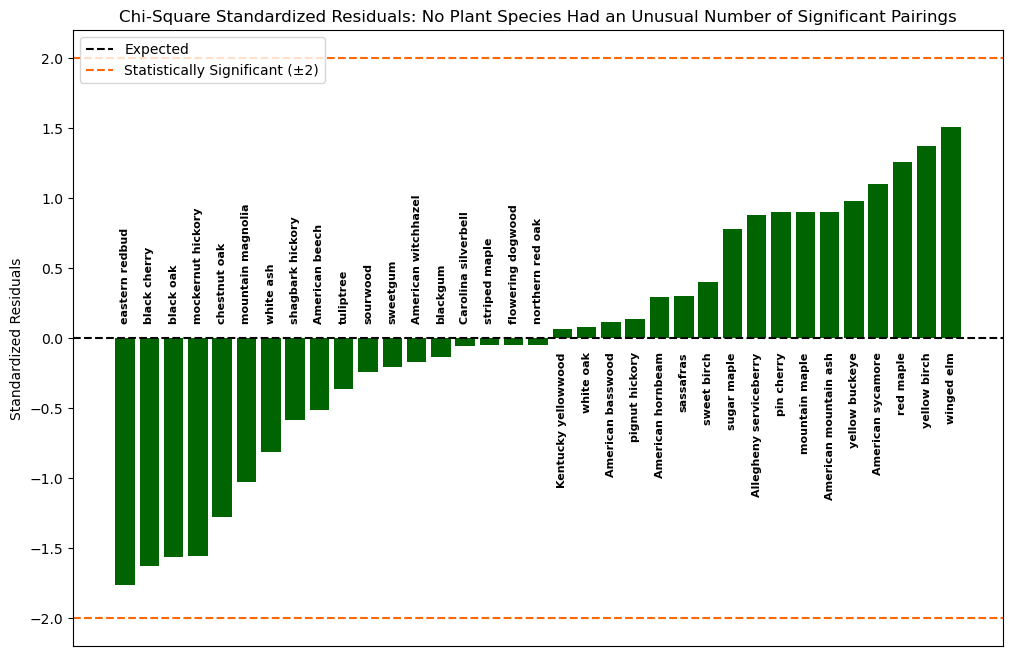

In [266]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate standardized residuals
chi_square_results["standardized_residuals"] = (
    chi_square_results["observed"] - chi_square_results["expected"]
) / np.sqrt(chi_square_results["expected"])

# Convert species_id to int and map to common name
chi_square_results["common_name"] = chi_square_results["species"].astype(int).map(species_dict)

# Sort by residuals for better visualization
df_sorted = chi_square_results.sort_values("standardized_residuals", ascending=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Ensure very small bars are still visible without flipping signs
min_width = 0.05  # Minimum visible bar width
bar_widths = df_sorted["standardized_residuals"].apply(
    lambda x: x if abs(x) > min_width else min_width * np.sign(x)
)

# Use a fixed light blue color
bar_color = "#006400"  # Light blue hex code

# Plot residuals as a vertical bar chart
bars = plt.bar(range(len(df_sorted)), bar_widths, color=bar_color, alpha=1)

# Add common names on the **opposite side** of the bars
for bar, label, value in zip(bars, df_sorted["common_name"], df_sorted["standardized_residuals"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text horizontally
        0.1 if value < 0 else -0.1,  # Place text on the opposite side
        label,
        ha="center",
        va="bottom" if value < 0 else "top",
        fontsize=8,
        color="black",
        fontweight="bold",
        rotation=90
    )

# Remove x-axis labels
plt.xticks([])

# Add reference lines at 0, ±2 for statistical significance
plt.axhline(y=0, color="black", linestyle="--", label="Expected")
plt.axhline(y=2, color="#FF6700", linestyle="--", label="Statistically Significant (+2)")
plt.axhline(y=-2, color="#FF6700", linestyle="--", label="Statistically Significant (-2)")

plt.ylabel("Standardized Residuals")
plt.title("Chi-Square Standardized Residuals: No Plant Species Had an Unusual Number of Significant Pairings")
plt.legend(["Expected", "Statistically Significant (±2)"], loc="upper left")

plt.savefig("chi_square_residuals_fixed.png", dpi=300, bbox_inches="tight")
plt.show()



